El dataset que utilizaran contiene extractos de poemas/historias creadas por 3 reconocidos autores

- Mary Shelley: Autora de "Frankenstein"

- Edgar Allan Poe: Autor de Poemas como "El Cuervo"

- HP Lovecraft: Autor de libros como "El Necronomicon"

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

%matplotlib inline

import spacy
from sklearn.manifold import TSNE

# Cargar modelo de spaCy (asegúrate de haber descargado 'en_core_web_md')
nlp = spacy.load('en_core_web_md')

# Importar librerías para preprocesamiento avanzado
import re
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
stopwords_en = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


Autores en el dataset: ['Edgar Allan Poe' 'HP Lovecraft' 'Mary Shelley']


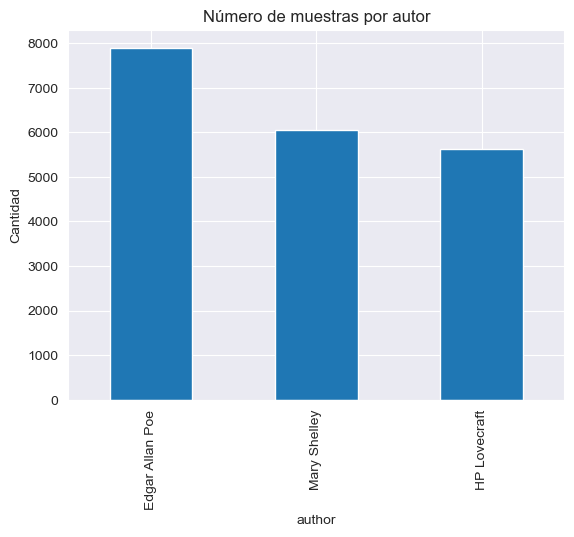

In [45]:
df = pd.read_csv('/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/authors_examen.csv')
df = df[['author', 'text']].dropna()

print("Autores en el dataset:", df['author'].unique())

# Gráfico de barras con el número de muestras por autor
df['author'].value_counts().plot(kind='bar')
plt.title("Número de muestras por autor")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
#Poner un comentario sobre el balance/desbalance de los datos. Existe alguna categoria sobre/sub representada? Como podria afectar esto al entrenamiento? (Profundizar en su respuesta)


Podemos notar que no es tanto el desbalance en el dataset, lo que podemos notar es que Edgar Allan Poe hay muestra mayores a las de Mary o de HP. Esto puede tener implicaciones en si creamos un modelo puede estar aprendiendo o identificando mejores los textos de Edgar Allan Poe.

En dado casa podemos hacer un oversamplion en nuestros modelo esto puede que tenga inconvenienvias a que nos entregue un accuracy bajo, pero ese se puede sacrificar eso para estar mejor balanceado nuestro dataset


In [47]:
def generar_texto_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    n_gram_strings = [' '.join(gram) for gram in n_grams]
    return " ".join(n_gram_strings)

def contar_ngrams(texto, n):
    tokens = word_tokenize(texto.lower())
    n_grams = ngrams(tokens, n)
    return Counter(n_grams)

def graficar_ngrams(ngrams_counter, titulo):
    ngrams_df = pd.DataFrame(ngrams_counter.most_common(10), columns=['n-gram', 'count'])
    ngrams_df['n-gram'] = ngrams_df['n-gram'].apply(lambda x: ' '.join(x))
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='n-gram', hue='n-gram', data=ngrams_df, legend=False)
    plt.title(titulo)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.tight_layout()
    plt.show()

In [67]:
# Crear unigramas para Edgar Allan Poe sin eliminar ninguna palabra (o con un filtro mínimo)
def contar_unigramas(texto):
    tokens = word_tokenize(texto.lower())
    return Counter(tokens)

texto_poe = ' '.join(df[df['author'] == 'Edgar Allan Poe']['text'])
contador_unigramas = contar_unigramas(texto_poe)
print(contador_unigramas.most_common(20))


[(',', 17594), ('the', 14969), ('of', 8970), ('.', 7646), ('and', 5733), ('to', 4761), ('a', 4711), ('in', 4124), ('i', 3780), ('that', 2327), ('it', 2326), ('was', 2229), ('my', 1788), ('with', 1695), ('is', 1668), ('``', 1628), ('at', 1588), ('as', 1570), ('which', 1488), ("''", 1359)]


In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))

def contar_palabras_interes(texto):
    tokens = word_tokenize(texto.lower())
    # Filtrar solo tokens alfabéticos que no sean stopwords
    tokens_filtrados = [token for token in tokens if token.isalpha() and token not in stopwords_en]
    return Counter(tokens_filtrados)

# Aplicar a los textos de Edgar Allan Poe
texto_poe = ' '.join(df[df['author'] == 'Edgar Allan Poe']['text'])
contador_interes = contar_palabras_interes(texto_poe)
print(contador_interes.most_common(20))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/JorgeJimenez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('upon', 1025), ('one', 655), ('could', 457), ('would', 416), ('said', 356), ('little', 275), ('say', 267), ('well', 265), ('made', 263), ('even', 260), ('time', 260), ('man', 256), ('however', 254), ('thus', 254), ('first', 249), ('us', 235), ('yet', 232), ('much', 230), ('found', 229), ('great', 227)]


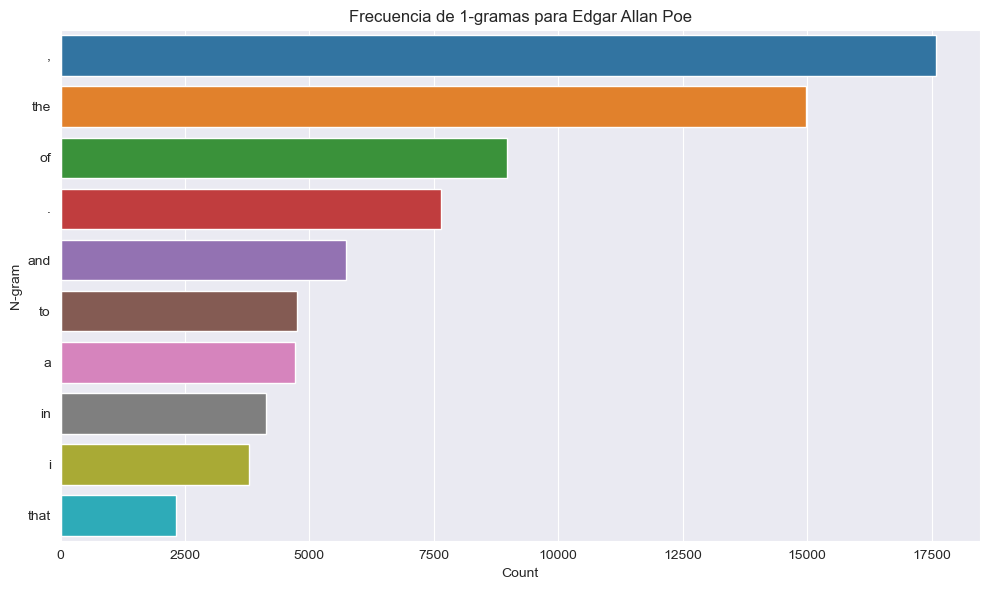

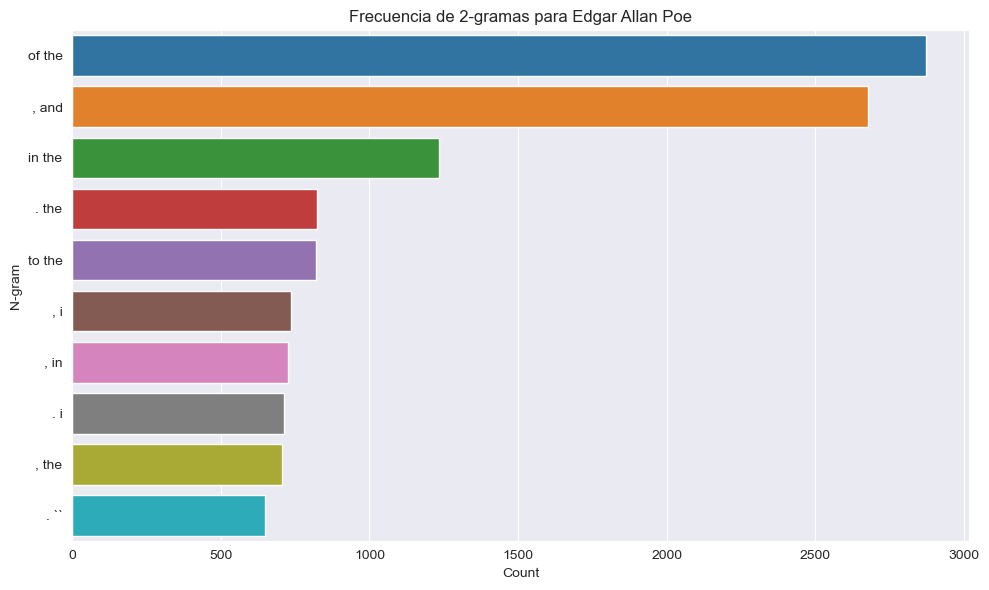

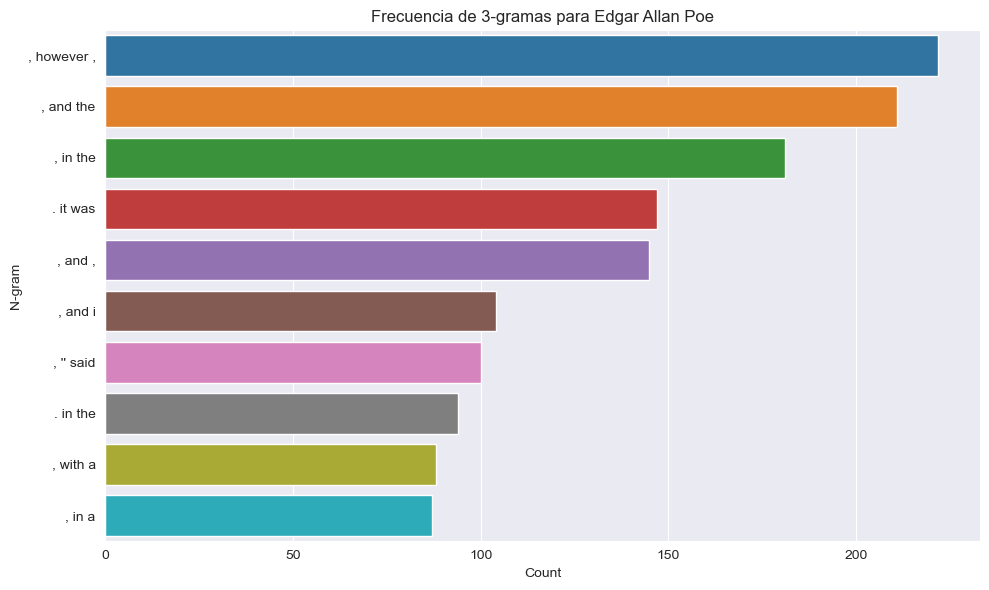

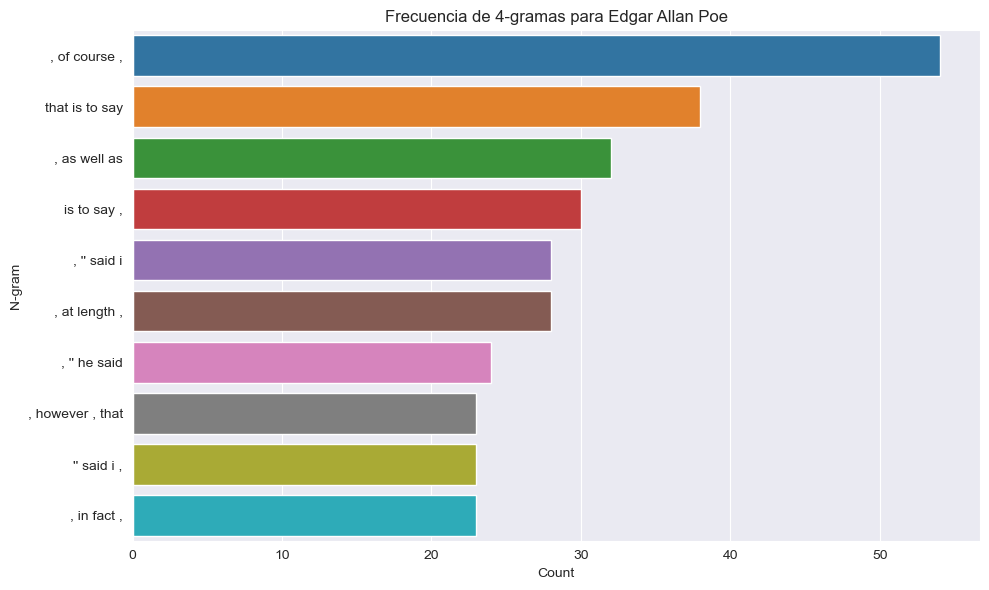

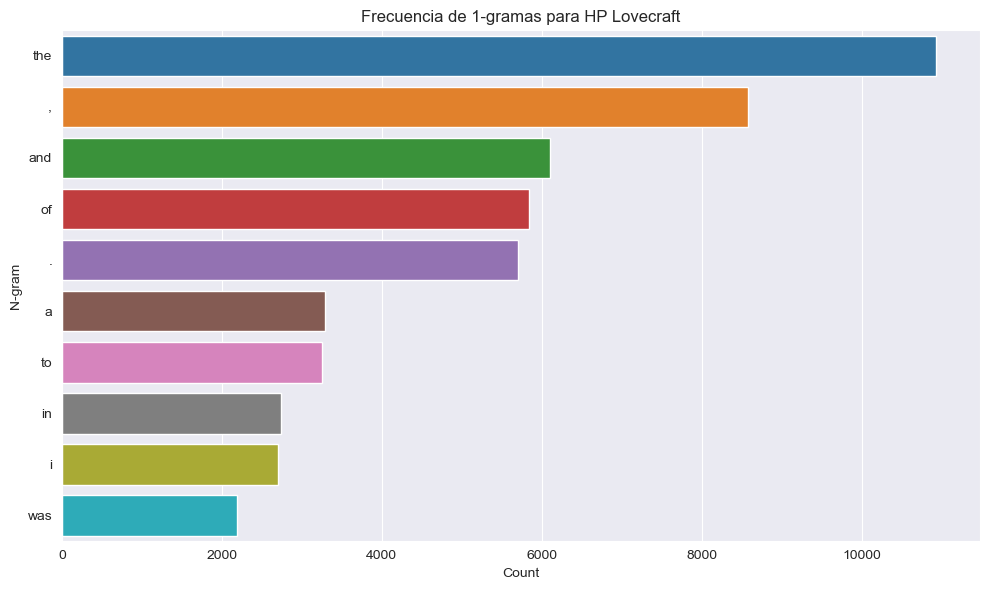

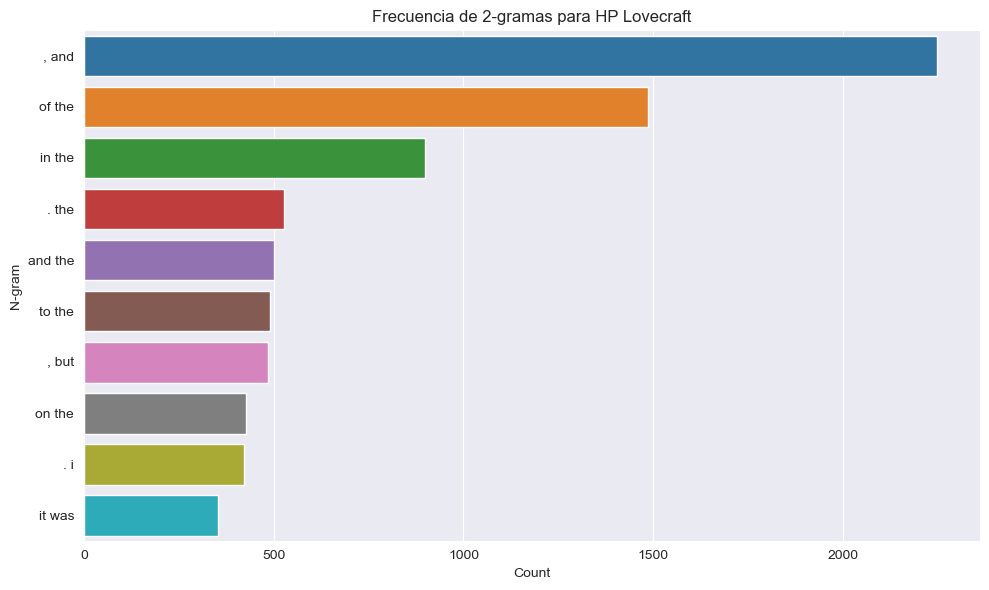

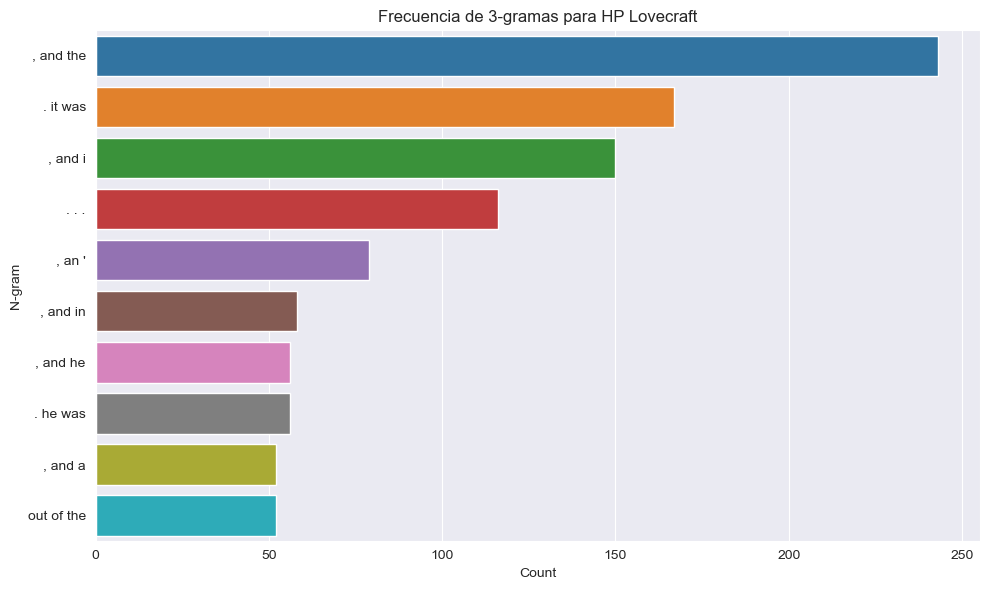

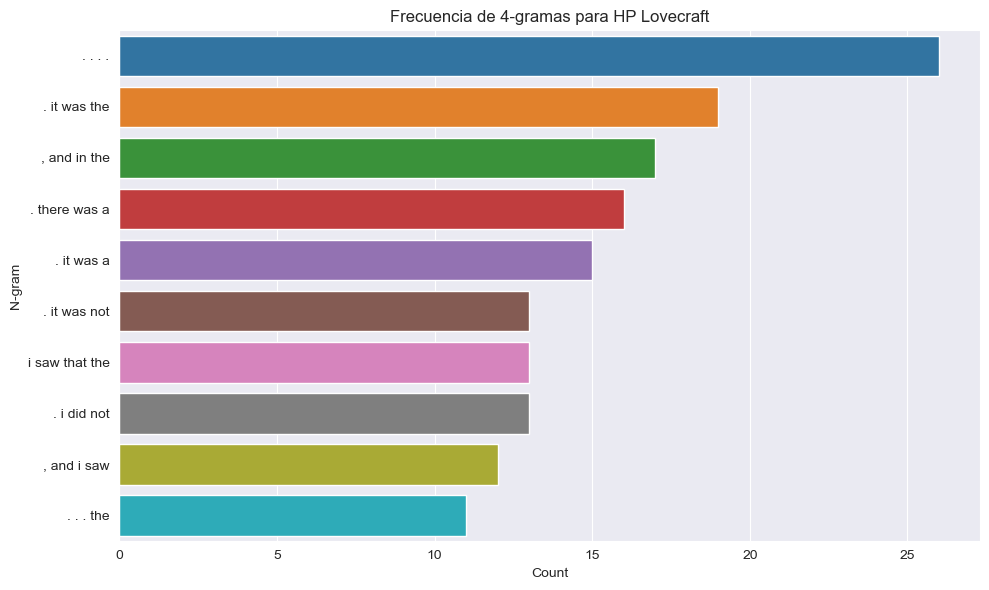

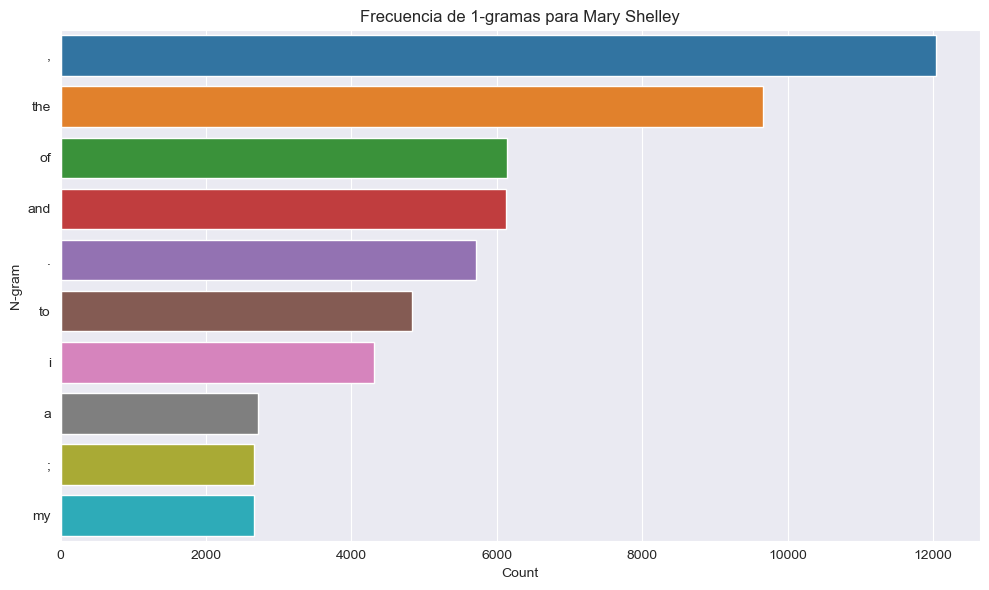

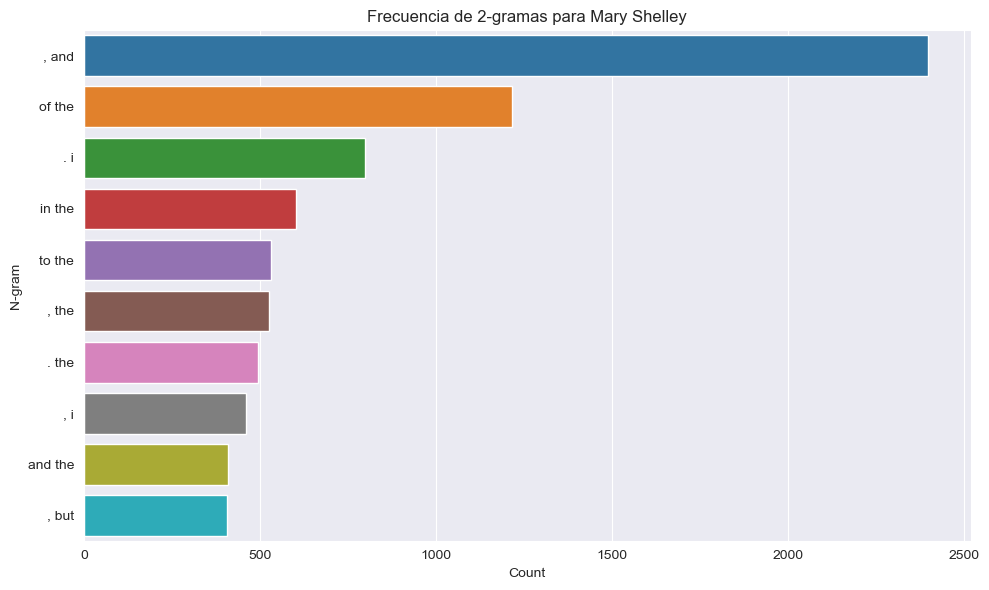

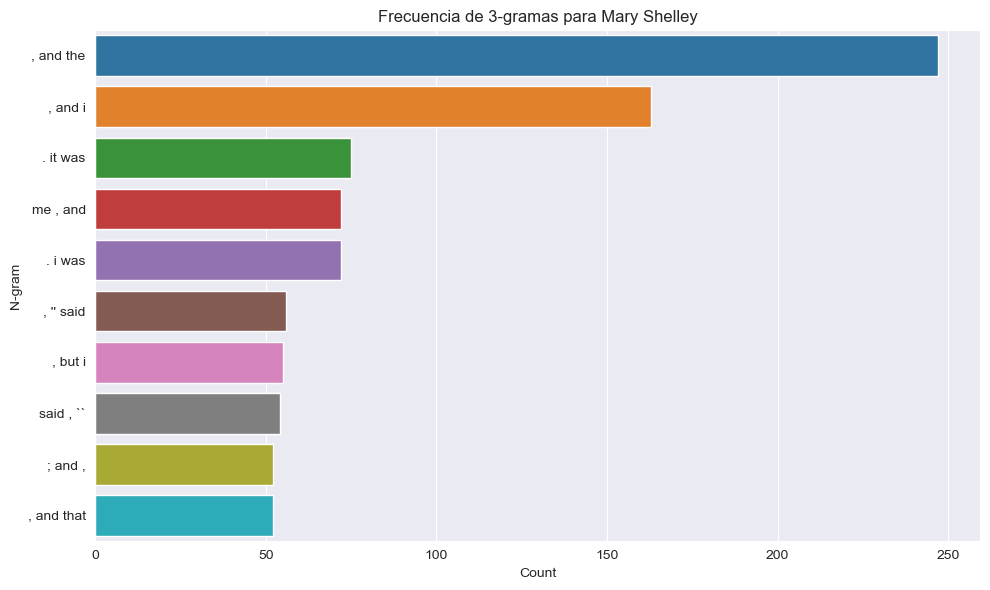

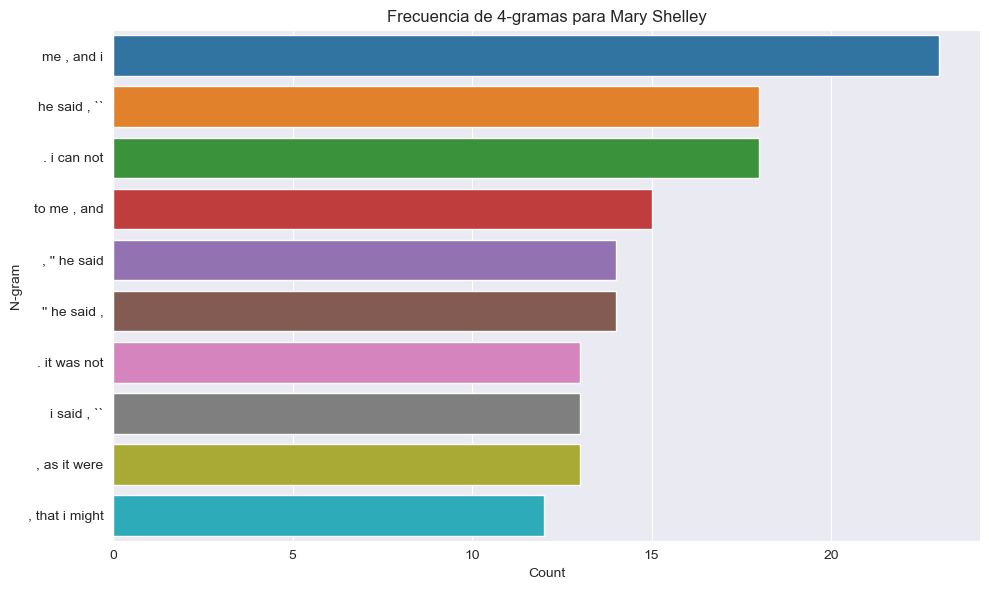

In [69]:
autores = df['author'].unique()
for autor in autores:
    texto_autor = ' '.join(df[df['author'] == autor]['text'])
    for n in range(1, 5):
        ngrams_counter = contar_ngrams(texto_autor, n)
        graficar_ngrams(ngrams_counter, f'Frecuencia de {n}-gramas para {autor}')


In [4]:
# Con base en la informacion mostrada por las nubes de palabras y graficos de barras, agregar un comentario explicando las posibles hipotesis generadas (Existe algun tema/palabra recurrente para algun autor en particular, parecieran todos hablar de lo mismo? Y otras observaciones de valor que puedan realizar. Recuerden profundizar en su respuesta)

Haciendo una limpieza en el texto eliminando simbolos frecuentes y stopwords en Edgar alllan poe y los demas autores hay demasiadas expresiones retoricas y conectores "and", "and the", "as well as,"
esto es en todos los autores, por lo gneral hay demasiadas expresiones retoricas y conectores.

Por lo que podemos encontrar algo de similitud en los textos ejemplo expresiones como “he said,”, “i saw,”, “it was,” o “was not,” aparecen con frecuencia en los tres. Esto indica que todos los autores recurren de forma reiterada a recursos de narración. Sin embargo podemos encontrar diferencias con Shelley ya que el empleas sus conectores mas estructurados y explciativos a comparacion de Poe y Lovecraft, lo que tiene sentido ya que ejemplo en su obra de Frankenstein podemos ver que es una literatura entre cientifica literario por lo que si tiene que ser mas estructurado

In [49]:
from wordcloud import WordCloud

def generar_nube_palabras(ngrams_counter, titulo):
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=50).generate_from_frequencies(ngrams_dict)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

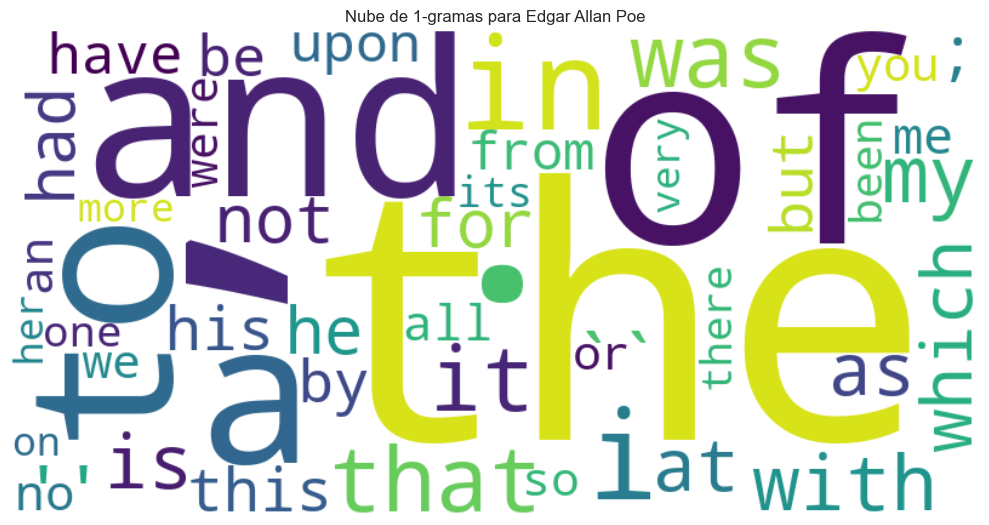

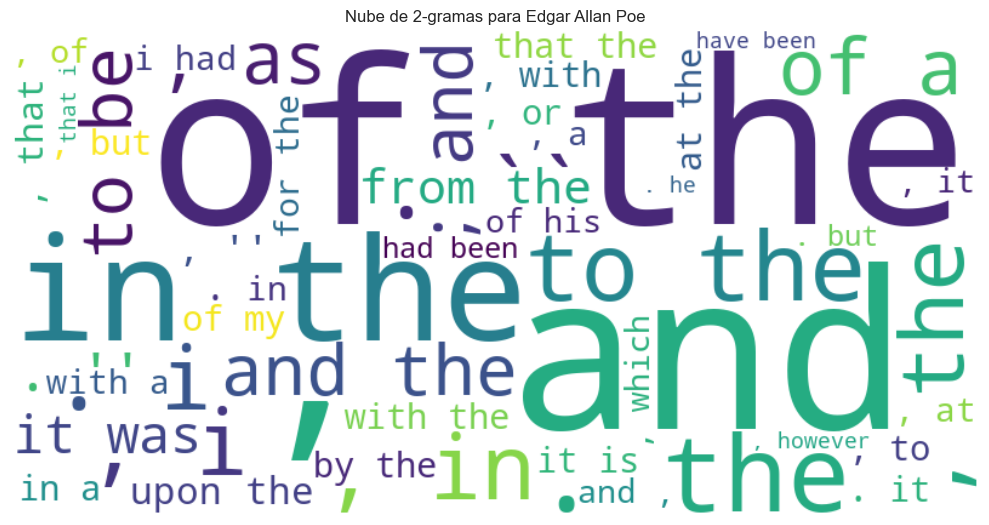

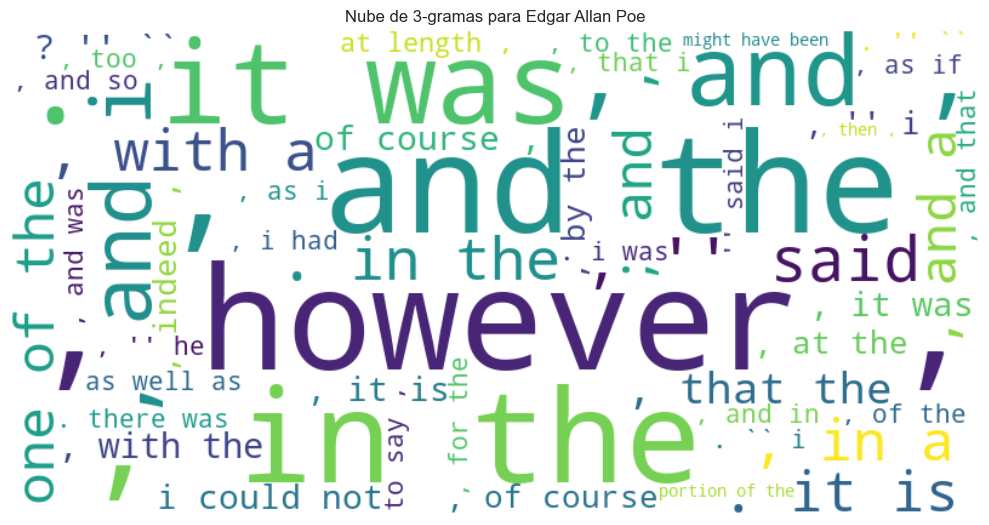

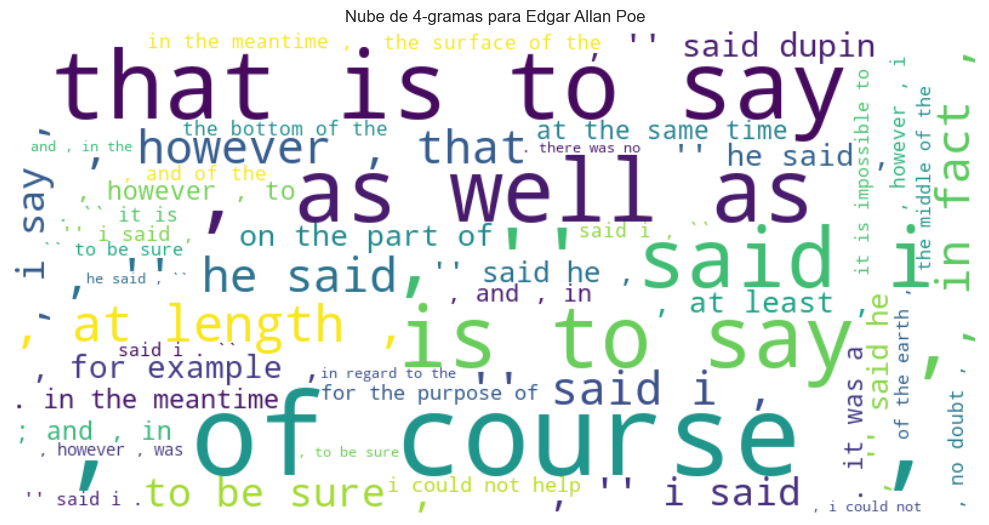

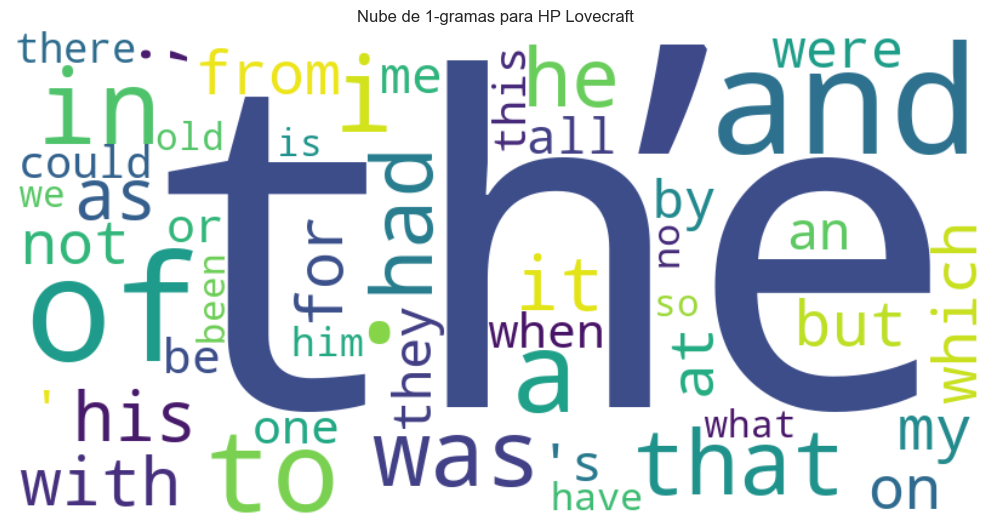

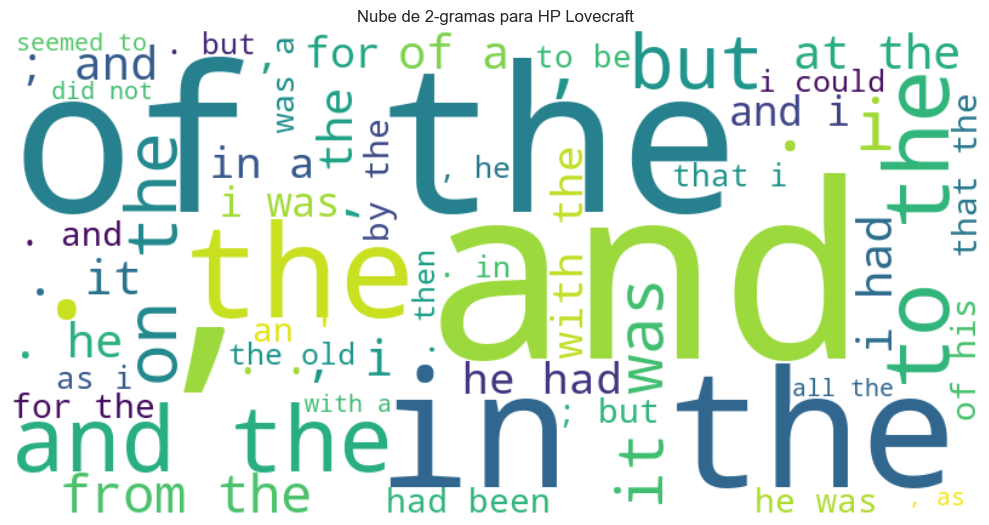

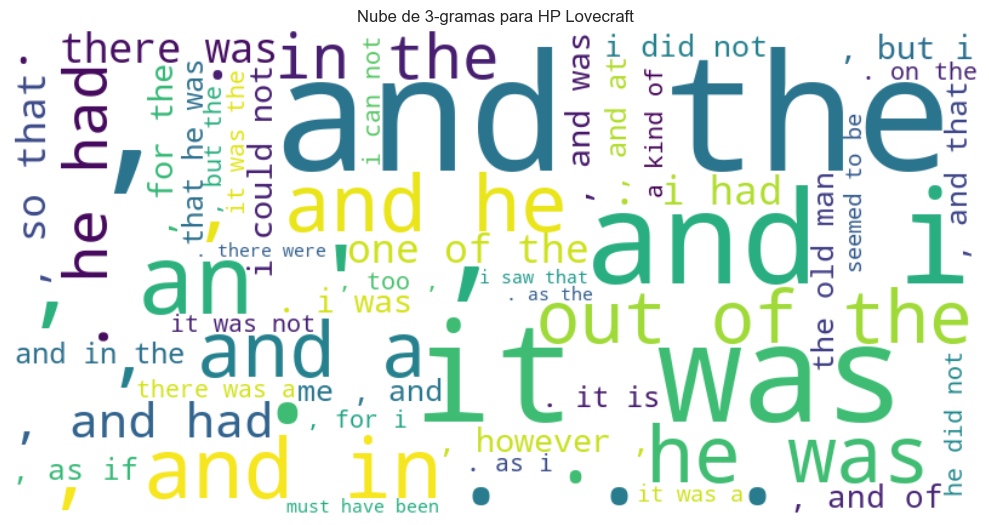

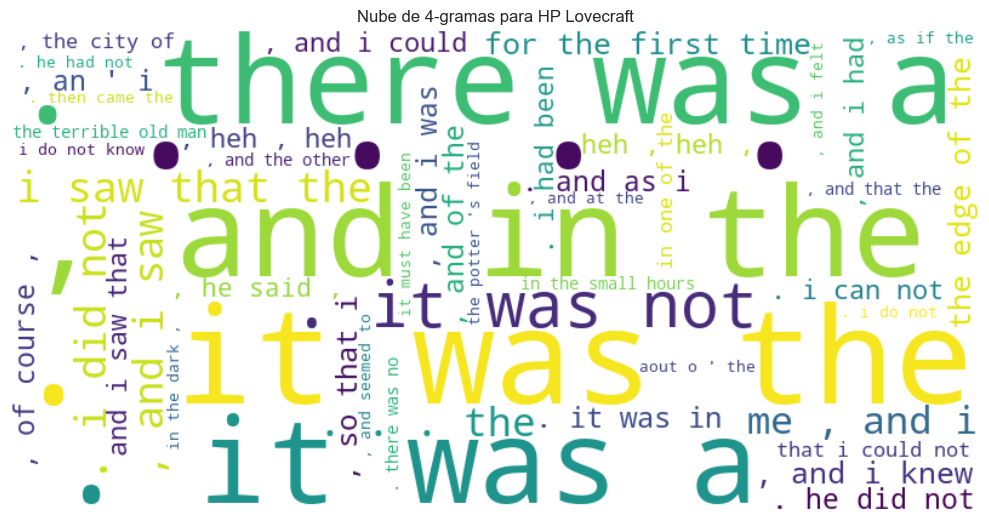

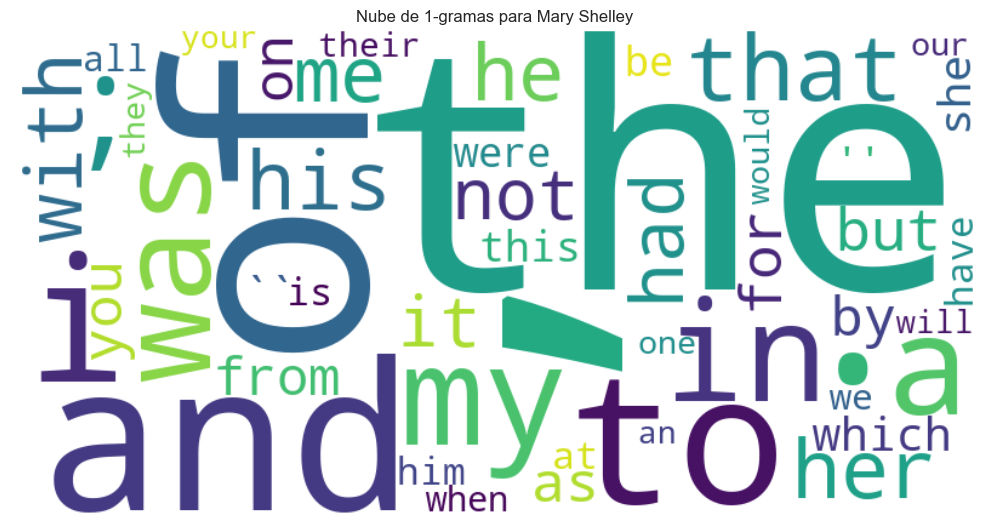

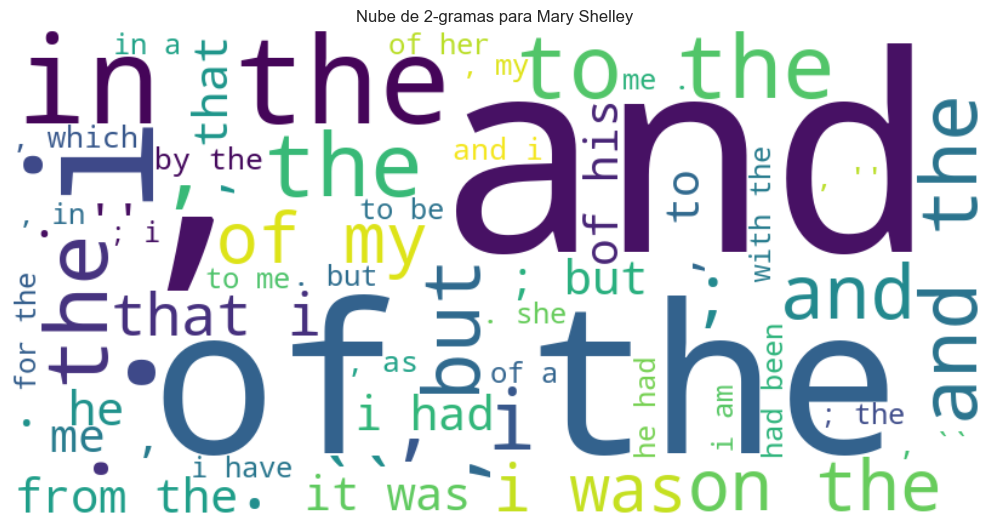

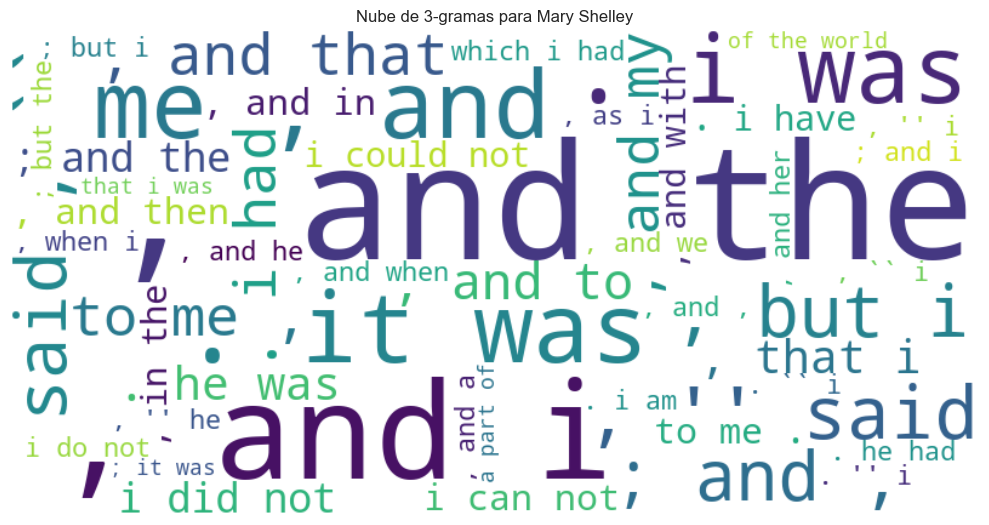

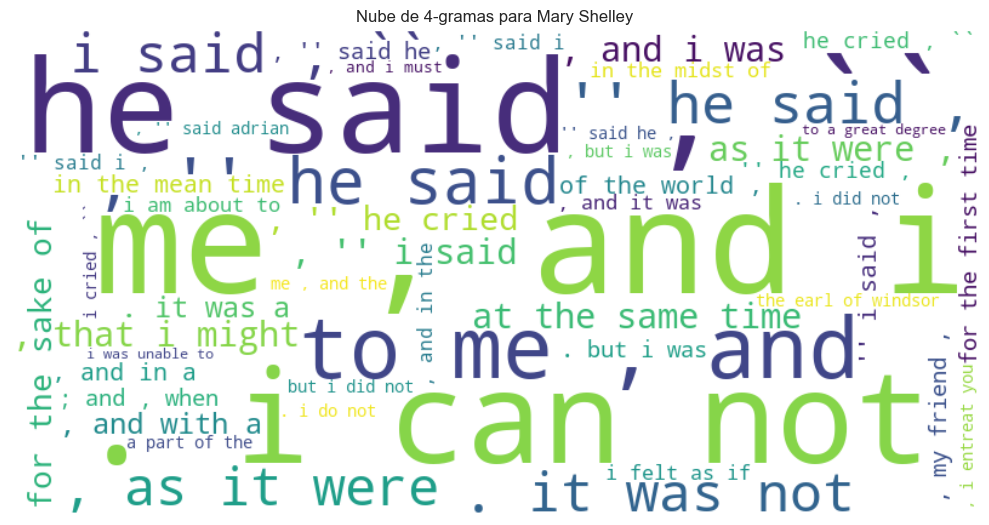

In [50]:
for autor in autores:
    texto_autor = ' '.join(df[df['author'] == autor]['text'])
    for n in range(1, 5):
        ngrams_cloud_counter = contar_ngrams(texto_autor, n)
        generar_nube_palabras(ngrams_cloud_counter, f'Nube de {n}-gramas para {autor}')


def generar_nube_con_mascara(ngrams_counter, titulo, ruta_mascara):
    ngrams_dict = {' '.join(ngram): count for ngram, count in ngrams_counter.items()}
    mascara_img = np.array(Image.open(ruta_mascara).convert('RGB'))
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='viridis', max_words=100, mask=mascara_img,
                          contour_width=1, contour_color='black').generate_from_frequencies(ngrams_dict)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titulo)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [51]:
mascaras = {
    'HP Lovecraft': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/png-transparent-cthulhu-symbol-cthulhu-miscellaneous-photography-fictional-character.png',
    'Mary Shelley': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/47b50e83011c4e8c945706519a2b7a0f.jpg',
    'Edgar Allan Poe': '/Users/JorgeJimenez/Documents/UP/NLP/2nd Exam/png-transparent-common-raven-raven-black-crow-graphic-fauna-bird-new-caledonian-crow.png'
}

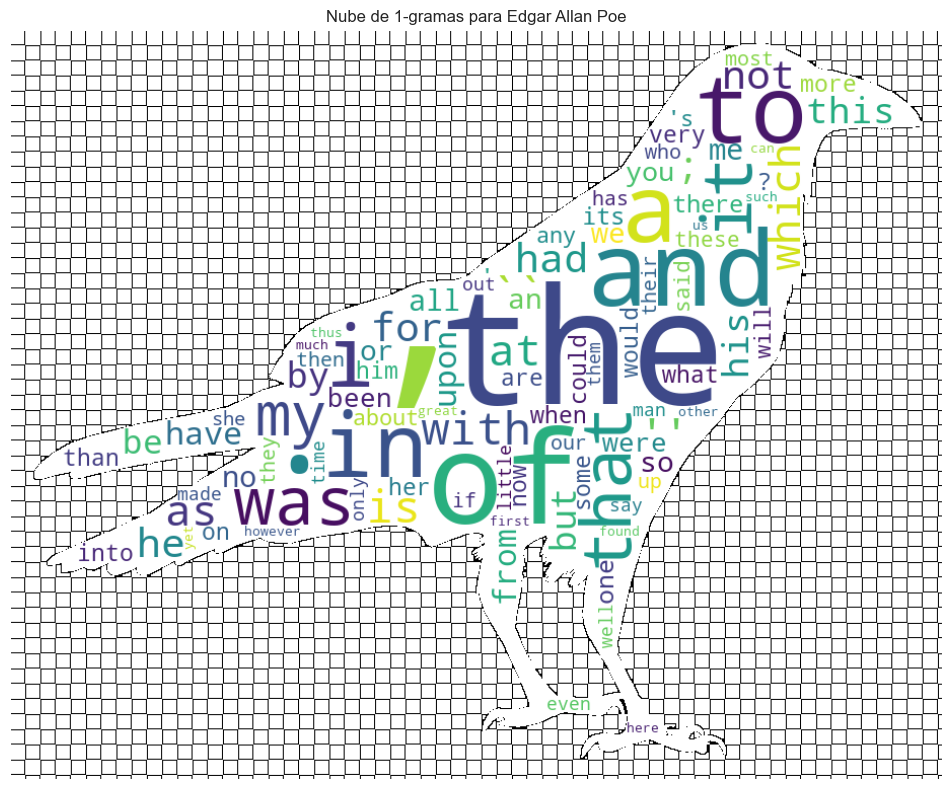

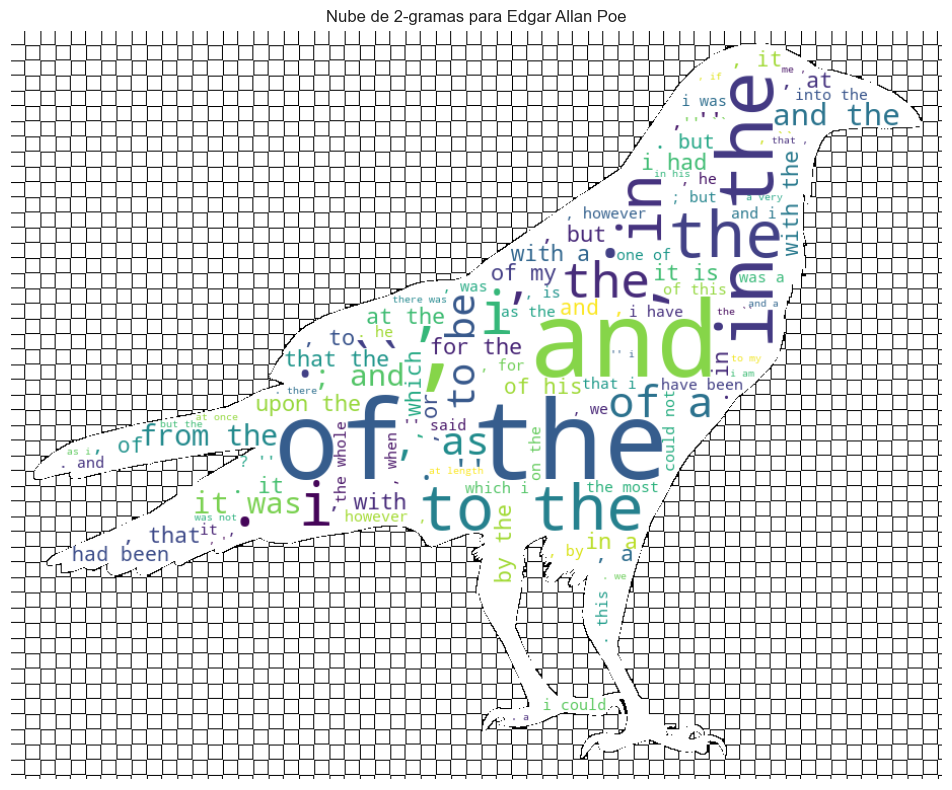

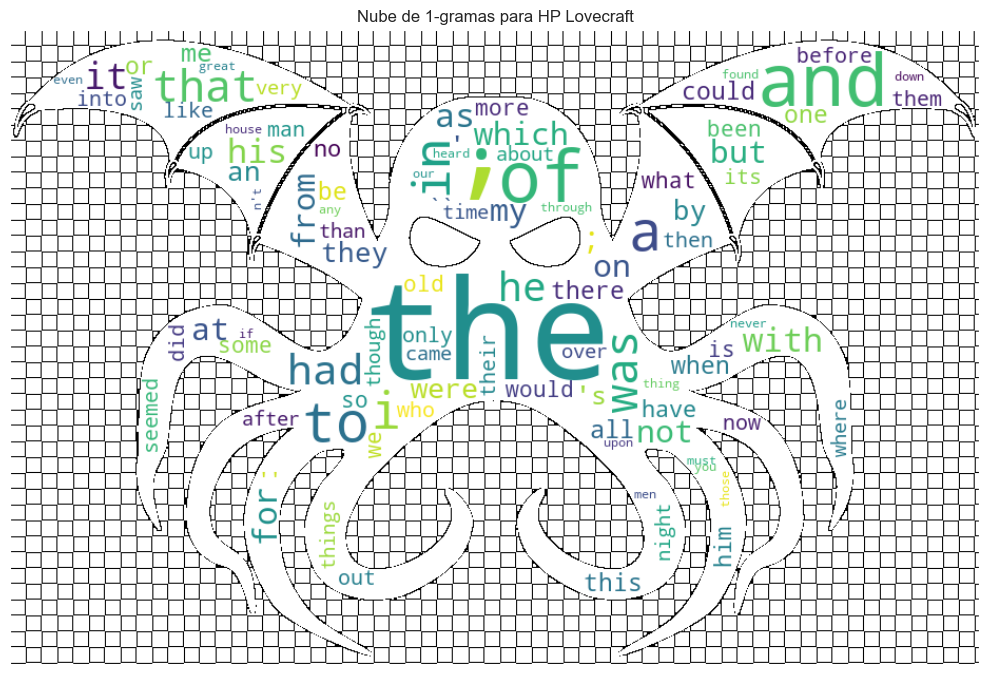

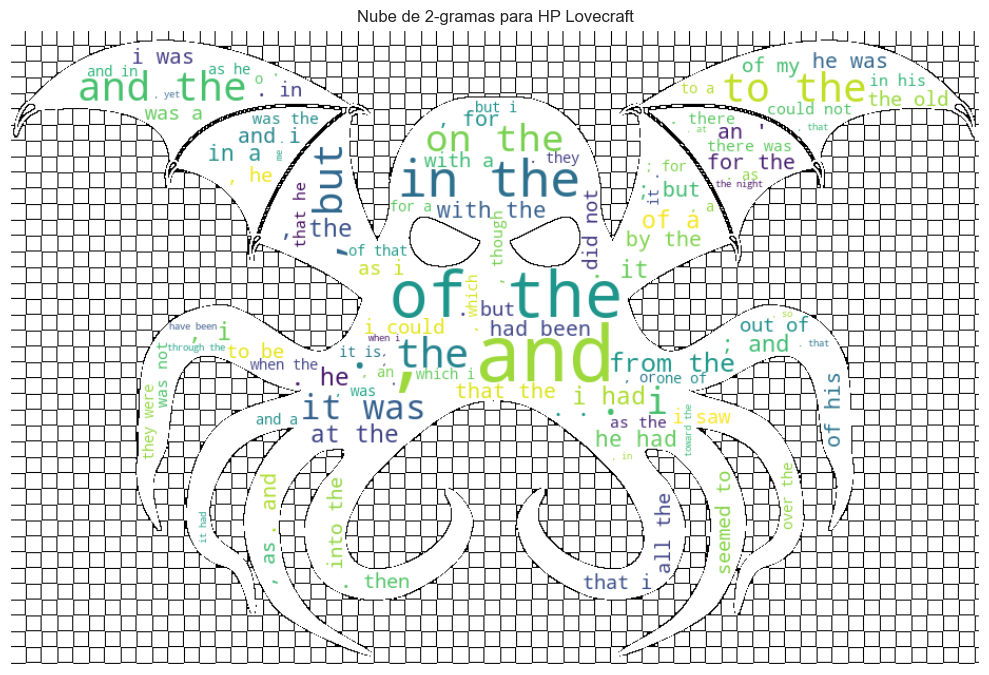

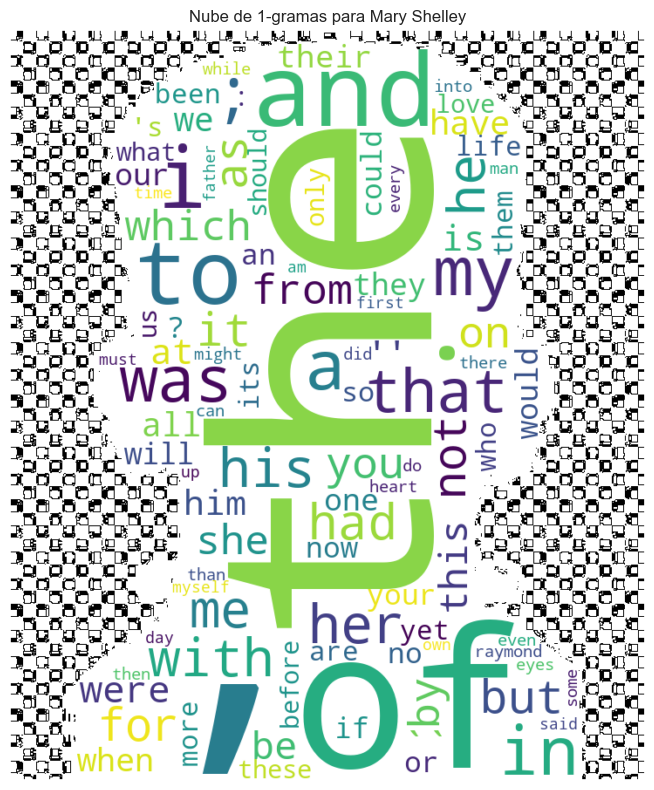

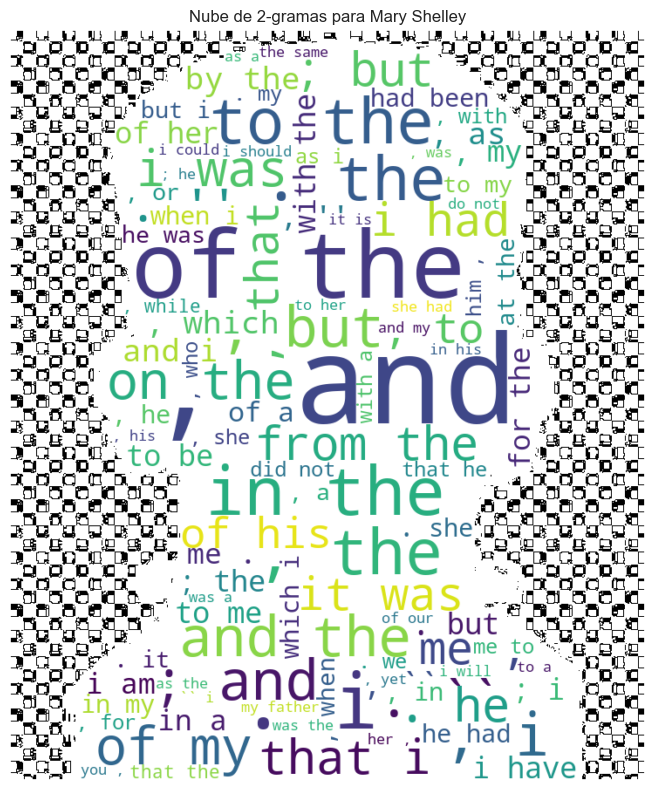

In [52]:
for autor in autores:
    texto_autor = ' '.join(df[df['author'] == autor]['text'])
    for n in range(1, 3):
        ngrams_counter = contar_ngrams(texto_autor, n)
        generar_nube_con_mascara(ngrams_counter, f'Nube de {n}-gramas para {autor}', mascaras[autor])


In [12]:
# Con base en la informacion mostrada por las nubes de palabras y graficos de barras, agregar un comentario explicando las posibles hipotesis generadas (Existe algun tema/palabra recurrente para algun autor en particular, parecieran todos hablar de lo mismo? Y otras observaciones de valor que puedan realizar. Recuerden profundizar en su respuesta)

Observamos que, a pesar de las diferencias temáticas entre los autores, la similitud en sus expresiones retóricas refleja un estilo narrativo compartido. Esta coincidencia en el uso de recursos lingüísticos comunes indica que, en un análisis inicial, los textos se enuentran parecidos puede ser debido a la epoca en la que escribieron dichos autores.

In [53]:
#Utilizando TSNE, crear un agrupamiento en 2D para observar las relaciones semanticas de los textos analizados (Pueden utilizar word2vec o GloVe para vectorizar)

# Función para vectorizar textos
def vectorize(texto):
    # Usando el preprocesamiento definido anteriormente (puedes ampliar si lo deseas)
    # Para este ejemplo, usaremos directamente spaCy (puedes combinar con el preprocesamiento avanzado si lo prefieres)
    doc = nlp(texto)
    return doc.vector

In [54]:
# Crear la columna de vectores
df['vector'] = df['text'].apply(vectorize)

# Stackear los vectores en una matriz X
X = np.vstack(df['vector'].values)

In [15]:
# Aplicar t-SNE
modelo_tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=3000)
resultado = modelo_tsne.fit_transform(X)

In [55]:
# Agregar las coordenadas al DataFrame
df['tsne_1'] = resultado[:, 0]
df['tsne_2'] = resultado[:, 1]

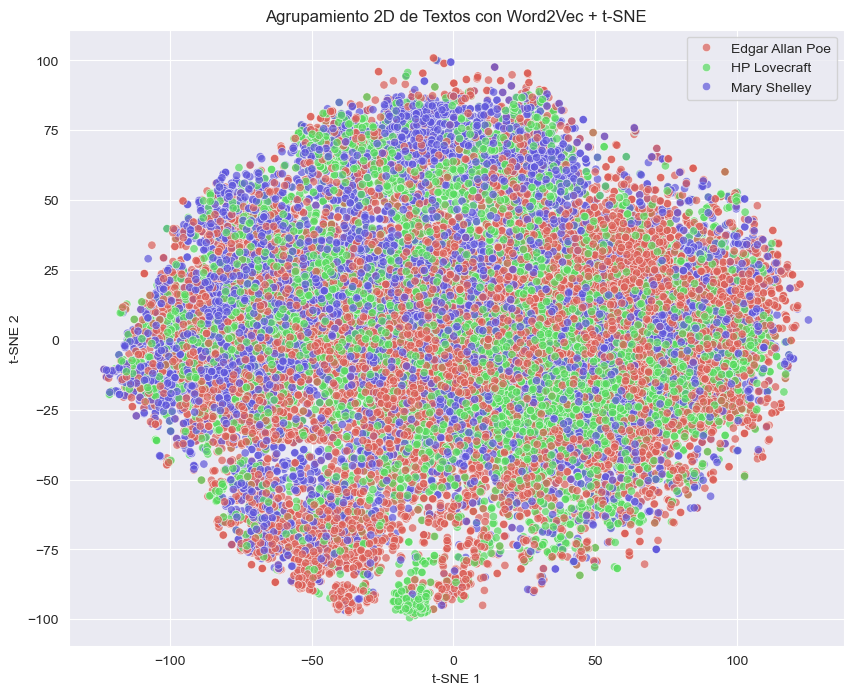

In [56]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="author",
    palette=sns.color_palette("hls", len(df['author'].unique())),
    data=df,
    alpha=0.7
)
plt.title('Agrupamiento 2D de Textos con Word2Vec + t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='best')
plt.show()

Con base en la visualziacion generada, poner un comentario con las observaciones que puedan destacar (hay agrupamientos evidentes? Clusteres de algun tema en especifico? Recuerden profundizar en su respuesta)

La visualización muestra que los estilos de Poe, Lovecraft y Shelley comparten una base lingüística común, esto es debido a que comparte similitud en simbolos y expresiones retoricas por lo qeu podemos ver que no se forma un cluster especifico, como ya lo habiamos mencionado antes podemos notar que se forma un pequeño cluster en la parte superior de Mary Shelly esto como lo haabiamos mencionado es que el estilo de Mary en ocasiones tiende a ser de una manera mas estructurada en sus textos, debido a que su forma de escribir es cientifico-literario, lo cual requiere que si sea mas estructurado para que se pueda entender a un publico mas comercial por eso tenemos literaturas tan reconocidas como Frankenstein.

In [57]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [59]:
X = np.vstack(df['vector'].values)

# Convertir etiquetas a números
le = LabelEncoder()
y = le.fit_transform(df['author'])

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

num_classes = len(set(y))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

fnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_fnn = fnn_model.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_data=(X_test, y_test_cat))


/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.4794 - loss: 1.0965 - val_accuracy: 0.5927 - val_loss: 0.8838
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5938 - loss: 0.9003 - val_accuracy: 0.6560 - val_loss: 0.7892
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.6297 - loss: 0.8466 - val_accuracy: 0.6798 - val_loss: 0.7648
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6539 - loss: 0.8046 - val_accuracy: 0.6683 - val_loss: 0.7725
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6596 - loss: 0.7959 - val_accuracy: 0.6897 - val_loss: 0.7306
Epoch 6/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6740 - loss: 0.7555 - val_accuracy: 0.6961 - val_loss: 0.7333
Epoch 7/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6683 - loss: 0.7550 - val_accuracy: 0.6951 - val_loss: 0.7197
Epoch 8/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6901 - loss: 0.7414 - val_ac

In [61]:
metrics_fnn = pd.DataFrame({
    'loss': history_fnn.history['loss'],
    'val_loss': history_fnn.history['val_loss'],
    'accuracy': history_fnn.history['accuracy'],
    'val_accuracy': history_fnn.history['val_accuracy']
})
print("Métricas del FNN:")
print(metrics_fnn.head())


Métricas del FNN:
       loss  val_loss  accuracy  val_accuracy
0  1.003389  0.883849  0.518483      0.592697
1  0.882194  0.789242  0.606333      0.656027
2  0.837504  0.764843  0.633914      0.679775
3  0.808041  0.772513  0.651599      0.668284
4  0.787235  0.730597  0.661878      0.689734


In [62]:
# Reorganizar (reshape) para CNN: se agrega una dimensión de canales
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn = cnn_model.fit(X_train_cnn, y_train_cat, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test_cat))


/Users/JorgeJimenez/miniconda3/envs/NLP310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3737 - loss: 1.1731 - val_accuracy: 0.4009 - val_loss: 1.0909
Epoch 2/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3919 - loss: 1.0878 - val_accuracy: 0.4009 - val_loss: 1.0777
Epoch 3/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4020 - loss: 1.0804 - val_accuracy: 0.4196 - val_loss: 1.0672
Epoch 4/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4111 - loss: 1.0761 - val_accuracy: 0.5181 - val_loss: 1.0773
Epoch 5/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4154 - loss: 1.0743 - val_accuracy: 0.4219 - val_loss: 1.0517
Epoch 6/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4121 - loss: 1.0712 - val_accuracy: 0.4244 - val_loss: 1.0480
Epoch 7/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4288 - loss: 1.0616 - val_accuracy: 0.4607 - val_loss: 1.0501
Epoch 8/30
490/490 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4387 - loss: 1.0608 - val_accu

In [63]:
metrics_cnn = pd.DataFrame({
    'loss': history_cnn.history['loss'],
    'val_loss': history_cnn.history['val_loss'],
    'accuracy': history_cnn.history['accuracy'],
    'val_accuracy': history_cnn.history['val_accuracy']
})
print("Métricas del CNN:")
print(metrics_cnn.head())


Métricas del CNN:
       loss  val_loss  accuracy  val_accuracy
0  1.117928  1.090864  0.384281      0.400919
1  1.084934  1.077718  0.397050      0.400919
2  1.078959  1.067196  0.402605      0.419561
3  1.074385  1.077327  0.412182      0.518131
4  1.073369  1.051724  0.416331      0.421859


In [ ]:
# Con base en los modelos obtenidos, poner un comentario mencionando cual de los dos es mejor (Tomar en cuenta metricas de clasificacion ,asi como tiempos de entrenamiento. Recuerden profundizar en su respuesta)

Después de comparar ambos modelos, noté que el modelo FNN (red neuronal totalmente conectada) tiene un desempeño claramente superior al de la CNN en este experimento. En concreto, el FNN alcanzó una precisión de validación más alta y su entrenamiento resultó ser más estable y rápido. Esto indica que, con la representación vectorial obtenida de spacy, el FNN captura mejor los patrones globales del texto.



In [66]:
new_examples = [
    {
        "expected_author": "Edgar Allan Poe",
        "text": '''Back into the chamber turning, all my soul within me burning,
Soon again I heard a tapping somewhat louder than before.
“Surely,” said I, “surely that is something at my window lattice,
Let me see, then, what thereat is, and this mystery explore—
Let my heart be still a moment and this mystery explore;—
'Tis the wind and nothing more.'''
    },
    {
        "expected_author": "Edgar Allan Poe",
        "text": '''I soon noticed a special reasoning power he had, an unusual
reasoning power. Using it gave him great pleasure. He told me once,
with a soft and quiet laugh, that most men have windows over their
hearts; through these he could see into their souls. Then, he surprised
me by telling what he knew about my own soul; and I found that he
knew things about me that I had thought only I could possibly know.
His manner at these moments was cold and distant.'''
    },
    {
        "expected_author": "HP Lovecraft",
        "text": '''I have traveled beneath the Seas, in search of the Palace of Our Master, and found the stone
monuments of vanquished civilizations, and deciphered the writings of some of these; while still others
remain mysteries to any man who lives. And these civilizations were destroyed because of the
knowledge contained in this book.'''
    },
    {
        "expected_author": "HP Lovecraft",
        "text": '''ALL IS SILENCE AS SPACE IS TORN BY THE RING OF THE BELL
MY BROTHERS AWAIT ON THE OTHER SIDE
HAR THAR! IAH! OUR NUMBERS ARE STRONG
WITHIN A TIME THAT IS NO TIME,
A SPACE THAT IS NO SPACE!
LA! IA! IA! KUTHLU'''
    },
    {
        "expected_author": "Mary Shelley",
        "text": '''As I applied so closely, it may be easily conceived that my progress was rapid. My ardour was indeed the astonishment of the students, and my proficiency that of the masters. Professor Krempe often asked me, with a sly smile, how Cornelius Agrippa went on? whilst M. Waldman expressed the most heartfelt exultation in my progress. Two years passed in this manner, during which I paid no visit to Geneva, but was engaged, heart and soul, in the pursuit of some discoveries, which I hoped to make.'''
    },
    {
        "expected_author": "Mary Shelley",
        "text": '''The summer months passed while I was thus engaged, heart and soul, in one pursuit. It was a most beautiful season; never did the fields bestow a more plentiful harvest, or the vines yield a more luxuriant vintage: but my eyes were insensible to the charms of nature. And the same feelings which made me neglect the scenes around me caused me also to forget those friends who were so many miles absent, and whom I had not seen for so long a time. I knew my silence disquieted them; and I well remembered the words of my father: "I know that while you are pleased with yourself, you will think of us with affection, and we shall hear regularly from you. You must pardon me if I regard any interruption in your correspondence as a proof that your other duties are equally neglected."'''
    }
]

print("Clasificaciones de nuevos textos (usando el FNN):\n")
for example in new_examples:
    vec = vectorize(example["text"])
    vec = vec.reshape(1, -1)
    pred_prob = fnn_model.predict(vec)
    pred_class = pred_prob.argmax(axis=1)[0]
    pred_author = le.inverse_transform([pred_class])[0]

    print("Texto esperado (autor):", example["expected_author"])
    print("Autor predicho:", pred_author)
    print("-" * 50)

Clasificaciones de nuevos textos (usando el FNN):

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Texto esperado (autor): Edgar Allan Poe
Autor predicho: Edgar Allan Poe
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Texto esperado (autor): Edgar Allan Poe
Autor predicho: HP Lovecraft
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Texto esperado (autor): HP Lovecraft
Autor predicho: HP Lovecraft
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Texto esperado (autor): HP Lovecraft
Autor predicho: Edgar Allan Poe
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Texto esperado (autor): Mary Shelley
Autor predicho: Edgar Allan Poe
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Texto esperado (autor): Mary Shelley
Autor predicho: Mary Shelley
--------------------------------------------------


In [ ]:
 #Agregar un comentario reflexionando sobre los resultados obtenidos. Tu modelo clasifico todos los textos correctamente? Si no lo hizo, a que crees que se pueda deber? (Profundizar en respuesta)

Al analizar el desempeño del modelo de clasificación de textos, observamos que, según las métricas generadas, el modelo tuvo un buen rendimiento en algunos casos, especialmente al predecir correctamente la autoría de textos de Edgar Allan Poe. Esto podría deberse a un desbalance en el dataset, donde los textos de Poe están sobrerrepresentados en comparación con los de H.P. Lovecraft y Mary Shelley. Este desbalance probablemente permitió que el modelo aprendiera mejor los patrones lingüísticos y estilísticos de Poe, como su uso de un lenguaje poético, rítmico y temas recurrentes de misterio y melancolía, lo que resultó en una mayor tasa de aciertos para este autor.

Sin embargo el modelo no clasifico de manera correcta ya que encontramos varias similitudes en la forma de como escriben esto se pudo ver desde el TSNE en donde no notamos clusters o agrupaciones lo cual nos dice que es complicado y la similitd es exagerada